In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from sectorizedradialprofile.calculate_radial_profile import CalculateRadialProfile
import matplotlib.pyplot as plt
from skimage import io
import sectorizedradialprofile
print(sectorizedradialprofile.__version__)
import numpy as np

1.1.1


In [2]:
%matplotlib notebook

Load the data

In [3]:
data_file = 'circle_profile.tif'
im = io.imread(data_file)
working_data = im[:,:]

Visualize data

<IPython.core.display.Javascript object>


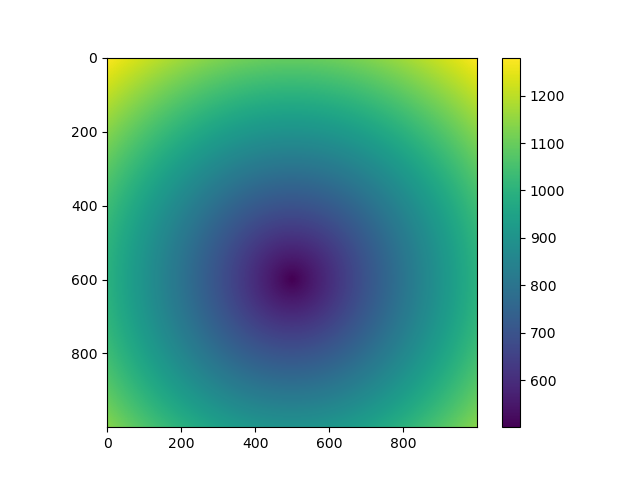

In [4]:
plt.figure(0)
plt.imshow(working_data)
plt.colorbar()

Define parameters

In [5]:
center = (400, 300)  # Has to be in a form of (x0, y0)
angle_range = (0, 90)  # Has to be in a form of (from_angle, to_angle). It can be 'None' if you don't want to constrain.

Calculate profile

In [6]:
o_profile = CalculateRadialProfile(data=working_data)  # Initialize the class with data input
o_profile.add_params(center=center, angle_range=angle_range)
o_profile.calculate()

radius array (to check **calculate_pixels_radius**)

<IPython.core.display.Javascript object>


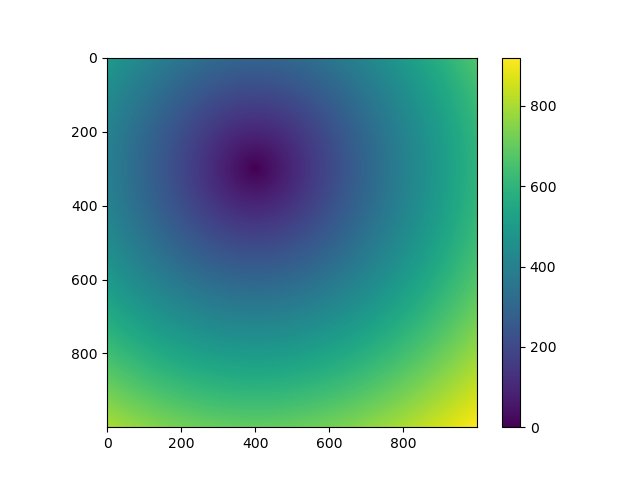

In [7]:
plt.figure(1)
radius_array = o_profile.radius_array
plt.imshow(radius_array)
plt.colorbar()

to check **calculate_pixels_angle_position**

<IPython.core.display.Javascript object>


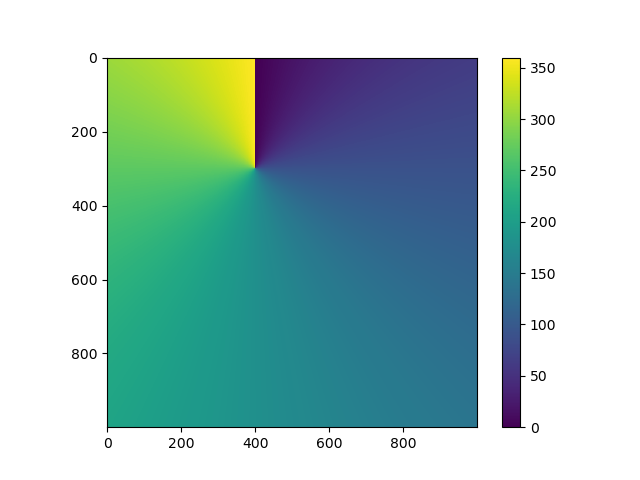

In [9]:
plt.figure(2)
array_angle_deg = o_profile.array_angle_deg
#plt.imshow(array_angle_deg)
plt.imshow(o_profile.intermediate_array_angle_deg)
plt.colorbar()



<IPython.core.display.Javascript object>


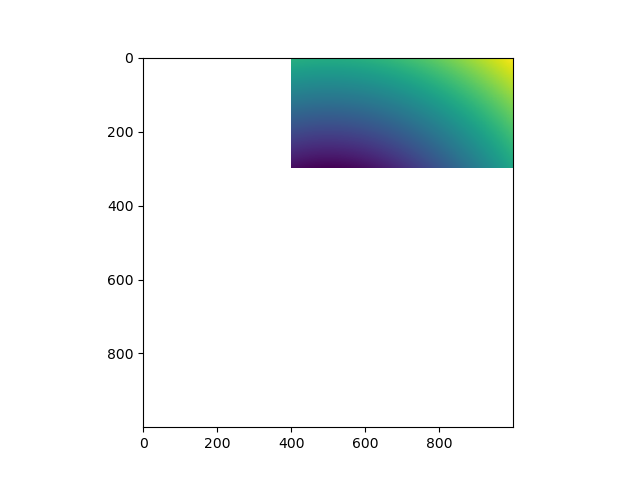

In [11]:
plt.figure(10)
plt.imshow(o_profile.working_data
          )

In [12]:
profile = o_profile.radial_profile
print(profile.head())
print(profile.tail())

                mean       std       sem
radius                                  
1.000000  815.913116  0.893076  0.631500
1.414214  816.231689       NaN       NaN
2.000000  816.232361  1.784340  1.261719
2.236068  816.551910  0.891264  0.630219
2.828427  816.872986       NaN       NaN
                   mean  std  sem
radius                           
668.588065  1278.018311  NaN  NaN
669.032137  1279.681030  NaN  NaN
669.032884  1278.785278  NaN  NaN
669.478902  1279.552734  NaN  NaN
669.926115  1280.320801  NaN  NaN


Check results

<IPython.core.display.Javascript object>


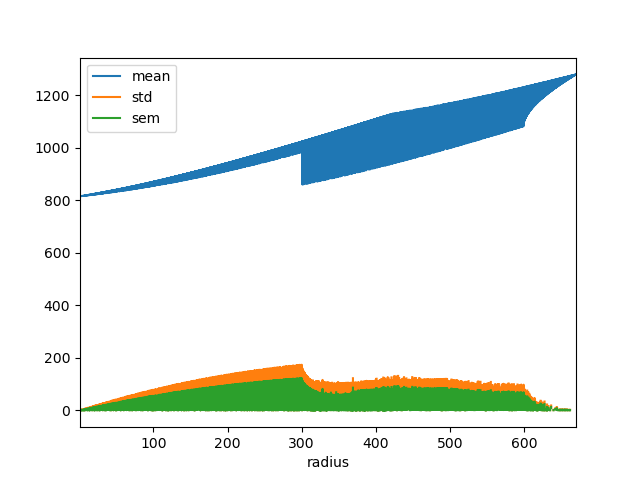

In [13]:
profile.plot()

<IPython.core.display.Javascript object>


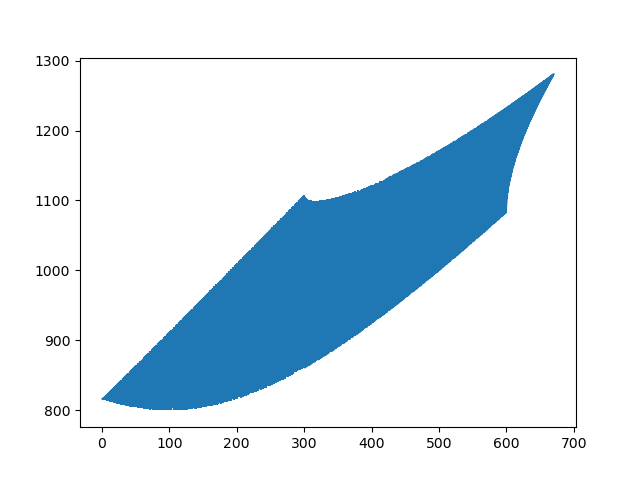

<ErrorbarContainer object of 3 artists>

In [14]:
plt.figure(3)
plt.errorbar(x=profile.index, y=profile['mean'], yerr=profile['sem'])